In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
cd ml-100k/

C:\Users\vasistas\Documents\From_Mydownloads\PGP-BDA\In_class\7th_Residency\Sunil_Kumar_Vuppala\Assignment\ml-100k\ml-100k


In [3]:
ls

 Volume in drive C is OSDisk
 Volume Serial Number is 3C85-DAC1

 Directory of C:\Users\vasistas\Documents\From_Mydownloads\PGP-BDA\In_class\7th_Residency\Sunil_Kumar_Vuppala\Assignment\ml-100k\ml-100k

02/14/2018  07:10 PM    <DIR>          .
02/14/2018  07:10 PM    <DIR>          ..
02/14/2018  07:09 PM    <DIR>          .ipynb_checkpoints
07/20/2000  02:39 AM               716 allbut.pl
07/20/2000  02:39 AM               643 mku.sh
02/14/2018  07:09 PM    <DIR>          ml-100k
01/30/2016  01:56 AM             6,750 README
07/20/2000  02:39 AM         1,979,173 u.data
07/20/2000  02:39 AM               202 u.genre
07/20/2000  02:39 AM                36 u.info
07/20/2000  02:39 AM           236,344 u.item
07/20/2000  02:39 AM               193 u.occupation
07/20/2000  02:39 AM            22,628 u.user
03/09/2001  12:03 AM         1,586,544 u1.base
03/09/2001  12:02 AM           392,629 u1.test
03/09/2001  12:03 AM         1,583,948 u2.base
03/09/2001  12:03 AM           395,225 u2.te

In [4]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=names)
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
n_users = df.user_id.unique().shape[0]

In [6]:
n_items = df.item_id.unique().shape[0]

In [7]:
print (str(n_users) + ' users')
print (str(n_items) + ' items')

943 users
1682 items


In [8]:
summary = df.describe(include = 'all')
summary = summary.transpose()

summary

,count,mean,std,min,25%,50%,75%,max
user_id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
item_id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [9]:
df.nunique()

user_id        943
item_id       1682
rating           5
timestamp    49282
dtype: int64

### Unique ratings are 5

In [10]:
from scipy import stats, integrate
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

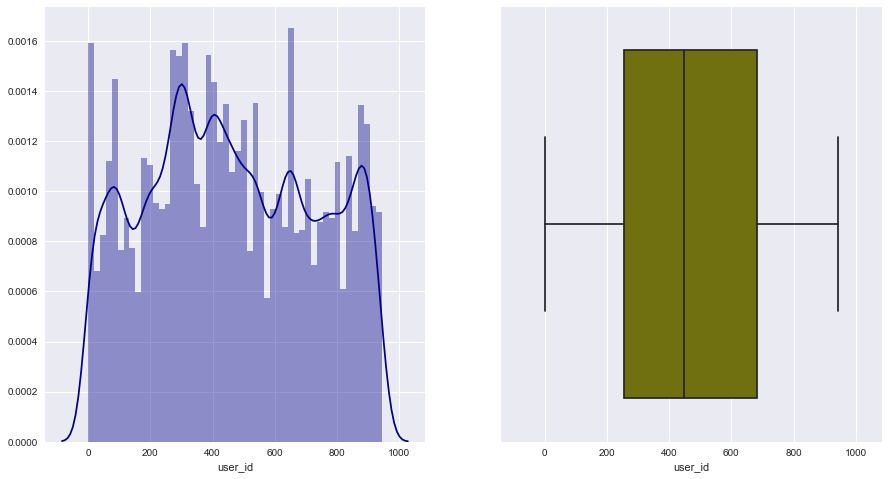

In [11]:
f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.distplot( df["user_id"] , color="darkblue", ax=axes[0])
sns.boxplot( df["user_id"] , color="olive", ax=axes[1])

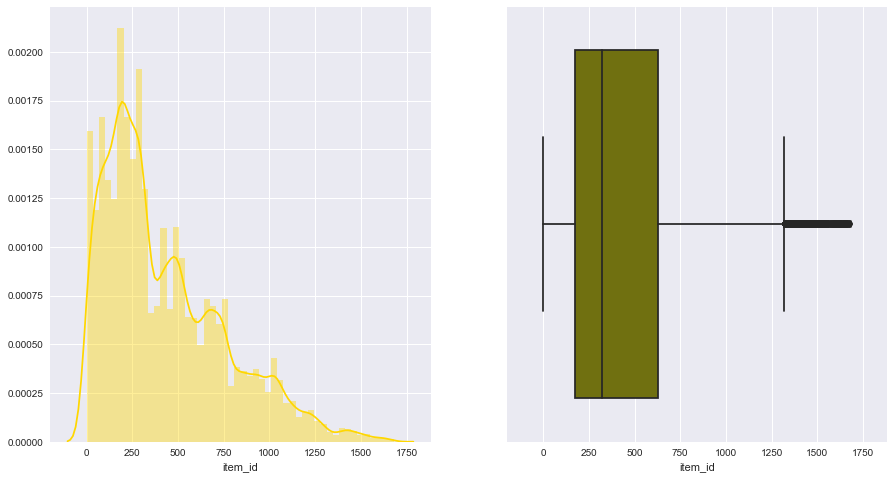

In [12]:
f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.distplot( df["item_id"] , color="gold", ax=axes[0])
sns.boxplot( df["item_id"] , color="olive", ax=axes[1])

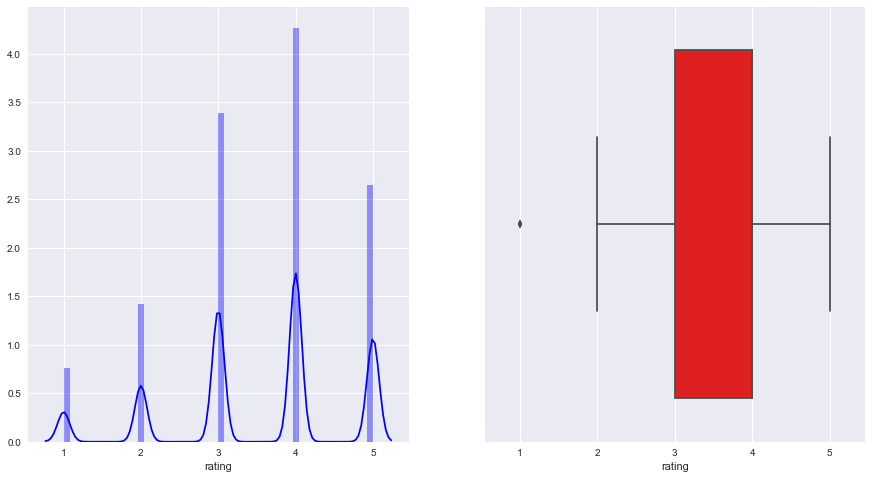

In [13]:
f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.distplot( df["rating"] , color="blue", ax=axes[0])
sns.boxplot( df["rating"] , color="red", ax=axes[1])

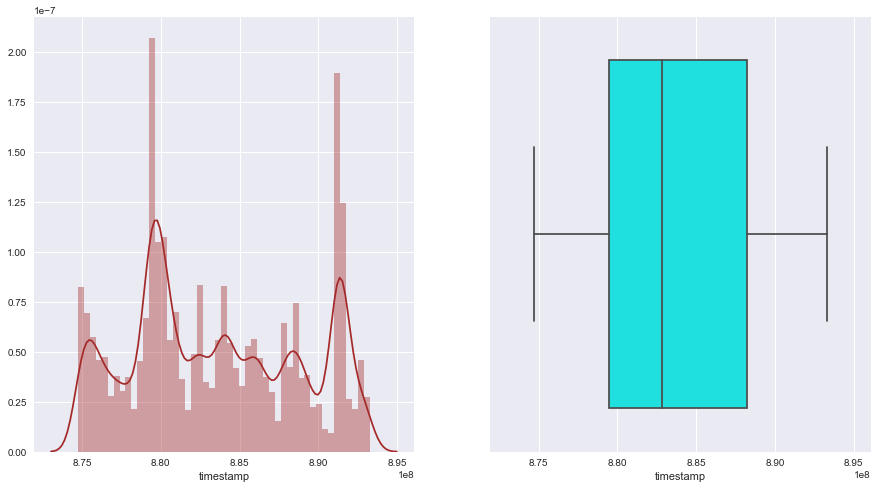

In [14]:
f, axes = plt.subplots(1, 2, figsize=(15, 8), sharex=True)
sns.distplot( df["timestamp"] , color="Brown", ax=axes[0])
sns.boxplot( df["timestamp"] , color="cyan", ax=axes[1])

Most recommendation models consist of building a user-by-item matrix with some sort of "interaction" number in each cell. If one includes the numerical ratings that users give items, then this is called an explicit feedback model. Alternatively, one may include implicit feedback which are actions by a user that signify a positive or negative preference for a given item (such as viewing the item online). These two scenarios often must be treated differently.

In the case of the MovieLens dataset, we have ratings, so we will focus on explicit feedback models. First, we must construct our user-item matrix. We can easily map user/item ID's to user/item indices by removing the "Python starts at 0" offset between them.

In [15]:
ratings = np.zeros((n_users, n_items))
ratings

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [16]:

for row in df.itertuples():
    ratings[row[1]-1, row[2]-1] = row[3]
ratings

array([[ 5.,  3.,  4., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.]])

In [17]:
float(len(ratings.nonzero()[0]))

100000.0

In [18]:
ratings.shape[0]

943

In [19]:
ratings.shape[1]

1682

In [20]:
density = float(len(ratings.nonzero()[0]))
density /= (ratings.shape[0] * ratings.shape[1])
density *= 100
print ('density: {:4.2f}%'.format(density))

density: 6.30%


In [21]:
pd1 = df.groupby('user_id', as_index=False).item_id.agg(["count"])
pd2 = pd1.sort_values("count",ascending = True).reset_index()
pd2.head(15)

,user_id,count
0,202,20
1,441,20
2,685,20
3,34,20
4,36,20
5,824,20
6,147,20
7,143,20
8,866,20
9,572,20


In [22]:
pd_X = pd2["count"].value_counts().sort_values(ascending = False).head(10)
pd_X

20    32
21    24
22    23
23    21
24    21
26    19
33    16
25    16
27    16
28    15
Name: count, dtype: int64

In this dataset, every user has rated at least 20 movies which results in a reasonable density of 6.3%. This means that 6.3% of the user-item ratings have a value. Note that, although we filled in missing ratings as 0, we should not assume these values to truly be zero. More appropriately, they are just empty entries. 

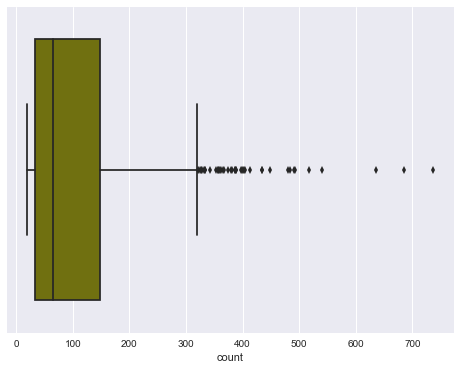

In [23]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot( pd1["count"] , color="olive")

### Trying to remove users who have seen less than 30 movies

In [24]:
pd2["count"].value_counts().head(10)

20    32
21    24
22    23
23    21
24    21
26    19
33    16
25    16
27    16
28    15
Name: count, dtype: int64

In [25]:
pd3 = pd2[pd2["count"]<=30]
pd3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 212
Data columns (total 2 columns):
user_id    213 non-null int64
count      213 non-null int64
dtypes: int64(2)
memory usage: 5.0 KB


In [26]:
pd3.head(5)

,user_id,count
0,202,20
1,441,20
2,685,20
3,34,20
4,36,20


In [27]:
user_ID_list = pd3.iloc[:,0].values


In [28]:
user_ID_list

array([202, 441, 685,  34,  36, 824, 147, 143, 866, 572, 418, 242, 812,
       571, 895, 809, 364, 926, 558,  93, 596, 166, 873, 732, 888, 631,
       309,  19, 740, 636, 300, 475, 876, 651,  61,  55, 820, 140, 302,
       762, 341, 818,  88, 687, 231, 512, 700, 310, 811,  78, 729, 252,
       516, 431, 858, 228, 220, 107, 384, 857, 400, 570, 273, 941, 369,
       170, 723, 681, 317, 513, 282, 155,   9, 245, 652,  39, 335, 205,
       132, 105, 278, 386, 127, 163, 914, 319, 547, 153, 765, 258, 266,
       855,  86, 461, 849, 520, 241,  51, 808, 662, 415, 240, 139,   4,
       584, 260, 124,  33, 111, 688, 356, 726, 656, 649,  50, 511, 443,
       444, 799, 578, 736, 832,  47, 353, 791, 134,  35, 822, 594, 362,
       598, 212, 414,  27, 725, 549, 816, 333, 909, 281, 482, 742, 485,
       247, 304, 810, 575, 133, 728, 801, 856, 915, 355, 920, 797, 120,
       261, 172, 191, 612,  98, 408, 289, 628, 842, 604, 785, 225,  46,
       583, 744, 359,  53, 182, 827,  17, 819, 613, 581, 219, 67

#### Forming new column 'user_id_imp' which will have value 0  for user_id if user has see less than or equal to 30 movies

In [29]:
df['user_id_imp'] = df['user_id'].apply(lambda x: x if x not in user_ID_list else 0)

In [30]:
df.head(15)

,user_id,item_id,rating,timestamp,user_id_imp
0,196,242,3,881250949,196
1,186,302,3,891717742,186
2,22,377,1,878887116,22
3,244,51,2,880606923,244
4,166,346,1,886397596,0
5,298,474,4,884182806,298
6,115,265,2,881171488,115
7,253,465,5,891628467,253
8,305,451,3,886324817,305
9,6,86,3,883603013,6


In [31]:
pd2[pd2['user_id'] == 166]

,user_id,count
21,166,20


In [32]:
df1 = df[df['user_id_imp'] != 0].copy()
df1 = df1.reset_index(drop = True)

In [33]:
df1.tail(15)

,user_id,item_id,rating,timestamp,user_id_imp
94834,617,582,4,883789294,617
94835,913,690,3,880824288,913
94836,660,229,2,891406212,660
94837,421,498,4,892241344,421
94838,495,1091,4,888637503,495
94839,806,421,4,882388897,806
94840,676,538,4,892685437,676
94841,721,262,3,877137285,721
94842,913,209,2,881367150,913
94843,378,78,3,880056976,378


In [34]:
df1.shape

(94849, 5)

In [35]:
df1[df1['user_id_imp'] != df1['user_id']]

,user_id,item_id,rating,timestamp,user_id_imp


In [36]:
df1.drop('user_id_imp',inplace=True,axis=1)

In [38]:
df2 = df1.sort_values("user_id",ascending=True).reset_index(drop=True)

### The df1 dataset contains only users who have seen more than 30 movies.

In [39]:
df1.head(15)

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,298,474,4,884182806
5,115,265,2,881171488
6,253,465,5,891628467
7,305,451,3,886324817
8,6,86,3,883603013
9,62,257,2,879372434


#### Finding out density again

In [40]:
n_users1 = df1.user_id.unique().shape[0]

In [41]:
n_items1 = df1.item_id.unique().shape[0]

In [42]:
print (str(n_users1) + ' users')
print (str(n_items1) + ' items')

730 users
1682 items


In [43]:
ratings1 = np.zeros((n_users, n_items))
ratings1

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [44]:
ratings1.shape[0]

943

In [45]:
ratings1.shape[1]

1682

In [46]:
for row in df1.itertuples():
    ratings1[row[1]-1, row[2]-1] = row[3]
ratings1

array([[ 5.,  3.,  4., ...,  0.,  0.,  0.],
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.]])

In [47]:
float(len(ratings1.nonzero()[0]))

94849.0

In [48]:
ratings1.shape[0]

943

In [49]:
ratings1.shape[1]

1682

In [50]:
density = float(len(ratings1.nonzero()[0]))
density /= (ratings1.shape[0] * ratings1.shape[1])
density *= 100
print ('density: {:4.2f}%'.format(density))

density: 5.98%


#### As it can be seen above the density of the matrix is reduced whereas on the contrary sparsity increased.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
trainDF, tempDF = train_test_split(ratings1, test_size=0.25, random_state=100)

In [53]:
trainDF.shape[0]

707

In [54]:
trainDF.shape[1]

1682

### Collaborative filtering

In [55]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(trainDF, metric='cosine')
user_similarity


array([[ 0.        ,  1.        ,  0.77256119, ...,  0.77651127,
         0.79247957,  0.49386877],
       [ 1.        ,  0.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 0.77256119,  1.        ,  0.        , ...,  0.7901757 ,
         0.90737794,  0.88037151],
       ..., 
       [ 0.77651127,  1.        ,  0.7901757 , ...,  0.        ,
         0.99475078,  0.8204122 ],
       [ 0.79247957,  1.        ,  0.90737794, ...,  0.99475078,
         0.        ,  0.74201625],
       [ 0.49386877,  1.        ,  0.88037151, ...,  0.8204122 ,
         0.74201625,  0.        ]])

#### The cosine similarity will range from 0 to 1 in our case (because there are no negative ratings). 

In [56]:
item_similarity = pairwise_distances(trainDF.T, metric='cosine')
item_similarity

array([[ 0.        ,  0.56355274,  0.67023341, ...,  1.        ,
         1.        ,  0.94399429],
       [ 0.56355274,  0.        ,  0.72285922, ...,  1.        ,
         1.        ,  0.91161165],
       [ 0.67023341,  0.72285922,  0.        , ...,  1.        ,
         1.        ,  0.89146381],
       ..., 
       [ 1.        ,  1.        ,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.94399429,  0.91161165,  0.89146381, ...,  1.        ,
         1.        ,  0.        ]])

In [57]:
print (user_similarity[:4, :4])

[[ 0.          1.          0.77256119  1.        ]
 [ 1.          0.          1.          1.        ]
 [ 0.77256119  1.          0.          1.        ]
 [ 1.          1.          1.          0.        ]]


In [58]:
print (item_similarity[:4, :4])

[[ 0.          0.56355274  0.67023341  0.49726632]
 [ 0.56355274  0.          0.72285922  0.49564372]
 [ 0.67023341  0.72285922  0.          0.66092083]
 [ 0.49726632  0.49564372  0.66092083  0.        ]]


#### With our similarity matrix in hand, we can now predict the ratings that were not included with the data. Using these predictions, we can then compare them with the test data to attempt to validate the quality of our " model.

In [59]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [60]:
item_prediction = predict(trainDF, item_similarity, type='item')
user_prediction = predict(trainDF, user_similarity, type='user')

#### Mean squared error function as our validation metric.

In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt
def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [62]:
print ('User-based CF MSE: ' + str(get_mse(user_prediction, tempDF)))
print ('Item-based CF MSE: ' + str(get_mse(item_prediction, tempDF)))

User-based CF MSE: 3.0955148970243584
Item-based CF MSE: 3.495931416609733


####  Comparing user- and item-based collaborative filtering, it looks like user-based collaborative filtering gives us a better result.

### Top-kk Collaborative Filtering

#### We can attempt to improve our prediction MSE by only considering the top kk users who are most similar to the input user (or, similarly, the top kk items).

In [63]:
def predict_topk(ratings, similarity, kind='user', k=40):
    pred = np.zeros(ratings.shape)
    if kind == 'user':
        for i in range(ratings.shape[0]):
            top_k_users = [np.argsort(similarity[:,i])[:-k-1:-1]]
            for j in range(ratings.shape[1]):
                pred[i, j] = similarity[i, :][top_k_users].dot(ratings[:, j][top_k_users]) 
                pred[i, j] /= np.sum(np.abs(similarity[i, :][top_k_users]))
    if kind == 'item':
        for j in range(ratings.shape[1]):
            top_k_items = [np.argsort(similarity[:,j])[:-k-1:-1]]
            for i in range(ratings.shape[0]):
                pred[i, j] = similarity[j, :][top_k_items].dot(ratings[i, :][top_k_items].T) 
                pred[i, j] /= np.sum(np.abs(similarity[j, :][top_k_items]))        
    
    return pred

In [64]:
pred = predict_topk(trainDF, user_similarity, kind='user', k=40)
print ('Top-k User-based CF MSE: ' + str(get_mse(pred, tempDF)))

pred = predict_topk(trainDF, item_similarity, kind='item', k=40)
print ('Top-k Item-based CF MSE: ' + str(get_mse(pred, tempDF)))

Top-k User-based CF MSE: 3.519480469023001
Top-k Item-based CF MSE: 3.6469720217108788


In [65]:
k_array = [5, 15, 30, 50, 100, 200]
user_train_mse = []
user_test_mse = []
item_test_mse = []
item_train_mse = []

def get_mse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

for k in k_array:
    user_pred = predict_topk(trainDF, user_similarity, kind='user', k=k)
    item_pred = predict_topk(trainDF, item_similarity, kind='item', k=k)
    
    user_train_mse += [get_mse(user_pred, trainDF)]
    user_test_mse += [get_mse(user_pred, tempDF)]
    
    item_train_mse += [get_mse(item_pred, trainDF)]
    item_test_mse += [get_mse(item_pred, tempDF)]  
    


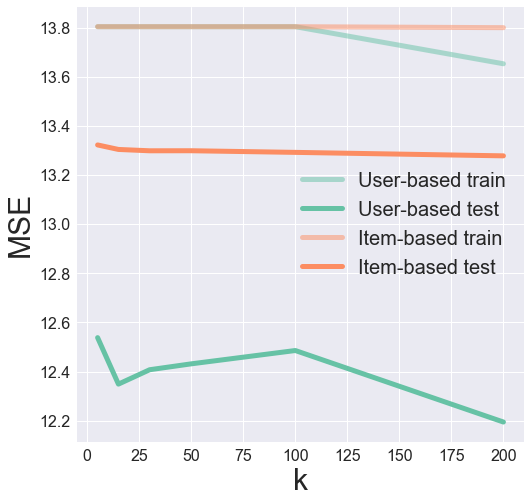

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pal = sns.color_palette("Set2", 2)

plt.figure(figsize=(8, 8))
plt.plot(k_array, user_train_mse, c=pal[0], label='User-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, user_test_mse, c=pal[0], label='User-based test', linewidth=5)
plt.plot(k_array, item_train_mse, c=pal[1], label='Item-based train', alpha=0.5, linewidth=5)
plt.plot(k_array, item_test_mse, c=pal[1], label='Item-based test', linewidth=5)
plt.legend(loc='best', fontsize=20)
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('k', fontsize=30);
plt.ylabel('MSE', fontsize=30);

In [67]:
i_cols = ['item_id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure','Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('u.item', sep='|', names=i_cols,encoding='latin-1')



In [68]:
movies.head(5)

,item_id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [69]:
movies.shape

(1682, 24)

In [70]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
item_id               1682 non-null int64
movie title           1682 non-null object
release date          1681 non-null object
video release date    0 non-null float64
IMDb URL              1679 non-null object
unknown               1682 non-null int64
Action                1682 non-null int64
Adventure             1682 non-null int64
Animation             1682 non-null int64
Children's            1682 non-null int64
Comedy                1682 non-null int64
Crime                 1682 non-null int64
Documentary           1682 non-null int64
Drama                 1682 non-null int64
Fantasy               1682 non-null int64
Film-Noir             1682 non-null int64
Horror                1682 non-null int64
Musical               1682 non-null int64
Mystery               1682 non-null int64
Romance               1682 non-null int64
Sci-Fi                1682 non-null int64
Thriller 

### video release date can be dropped completely

In [71]:
movies = movies.drop(['video release date', 'IMDb URL'], axis = 1)

In [72]:
      
R_df = df1.pivot(index = 'user_id', columns ='item_id', values = 'rating').fillna(0)
R_df.tail()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
938,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
943,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
item_df_pred = pd.DataFrame(data = item_prediction,columns = R_df.columns)
user_df_pred = pd.DataFrame(data = user_prediction,columns = R_df.columns)


In [74]:
item_df_pred.head(5)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,0.243341,0.268516,0.298008,0.238409,0.296755,0.334086,0.244753,0.258864,0.265949,0.305588,...,0.347388,0.344814,0.349613,0.349613,0.346914,0.352766,0.352766,0.352766,0.352766,0.340118
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.433007,0.471296,0.474784,0.421048,0.479917,0.446059,0.436622,0.416110,0.413588,0.422865,...,0.484972,0.479630,0.492633,0.492633,0.482623,0.490779,0.490779,0.490779,0.490779,0.484859
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.091352,0.110047,0.116934,0.093315,0.115842,0.118506,0.093674,0.094397,0.094929,0.108558,...,0.127708,0.124221,0.129733,0.129733,0.125904,0.129685,0.129685,0.129685,0.129685,0.127835


In [75]:
# return the movies with the highest predicted rating that the specified user hasn’t already rated
#Take specific user row from matrix from predictions
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # UserID starts at 1, not 0
    sorted_user_predictions = predictions_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.user_id == (userID)]
    #Added title and genres
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'item_id', right_on = 'item_id').
                     sort_values(['rating'], ascending=False)
                 )

    print ('User {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print ('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies_df[~movies_df['item_id'].isin(user_full['item_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'item_id',
               right_on = 'item_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations, sorted_user_predictions, user_data, user_full



### Item Based Recommendation for User 5

In [76]:
already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_movies(item_df_pred, 5, movies, df1, 10)

User 5 has already rated 175 movies.
Recommending the highest 10 predicted ratings movies not already rated.


### Already rated movies for user 5

In [77]:
already_rated.head(10)

,user_id,item_id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
174,5,174,5,875636130,Raiders of the Lost Ark (1981),01-Jan-1981,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
159,5,181,5,875635757,Return of the Jedi (1983),14-Mar-1997,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
39,5,153,5,875636375,"Fish Called Wanda, A (1988)",01-Jan-1988,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,5,396,5,875636265,Serial Mom (1994),01-Jan-1994,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
34,5,42,5,875636360,Clerks (1994),01-Jan-1994,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,5,436,5,875720717,"American Werewolf in London, An (1981)",01-Jan-1981,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
143,5,169,5,878844495,"Wrong Trousers, The (1993)",01-Jan-1993,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50,5,100,5,875635349,Fargo (1996),14-Feb-1997,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
121,5,172,5,875636130,"Empire Strikes Back, The (1980)",01-Jan-1980,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
115,5,408,5,878844495,"Close Shave, A (1995)",28-Apr-1996,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Predictions for user 5

In [78]:
predictions.head(10)

,item_id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1212,1388,Gabbeh (1996),27-Jun-1997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1468,1644,Sudden Manhattan (1996),13-Jun-1997,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1208,1384,Squeeze (1996),13-Jun-1997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1214,1390,"Innocent Sleep, The (1995)",27-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1211,1387,Fall (1997),27-Jun-1997,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1215,1391,For Ever Mozart (1996),04-Jul-1997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1080,1256,"Designated Mourner, The (1997)",23-May-1997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1204,1380,Hollow Reed (1996),02-May-1997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1209,1385,Roseanna's Grave (For Roseanna) (1997),20-Jun-1997,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1175,1351,Lover's Knot (1996),12-Jul-1996,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### User Based Recommendation For User 5

In [79]:
already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_movies(user_df_pred, 5, movies, df1, 10)

User 5 has already rated 175 movies.
Recommending the highest 10 predicted ratings movies not already rated.


In [80]:
already_rated.head(10)

,user_id,item_id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
174,5,174,5,875636130,Raiders of the Lost Ark (1981),01-Jan-1981,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
159,5,181,5,875635757,Return of the Jedi (1983),14-Mar-1997,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
39,5,153,5,875636375,"Fish Called Wanda, A (1988)",01-Jan-1988,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,5,396,5,875636265,Serial Mom (1994),01-Jan-1994,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
34,5,42,5,875636360,Clerks (1994),01-Jan-1994,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,5,436,5,875720717,"American Werewolf in London, An (1981)",01-Jan-1981,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
143,5,169,5,878844495,"Wrong Trousers, The (1993)",01-Jan-1993,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50,5,100,5,875635349,Fargo (1996),14-Feb-1997,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
121,5,172,5,875636130,"Empire Strikes Back, The (1980)",01-Jan-1980,0,1,1,0,...,0,0,0,0,0,1,1,0,1,0
115,5,408,5,878844495,"Close Shave, A (1995)",28-Apr-1996,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [81]:
predictions.head(10)

,item_id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
179,258,Contact (1997),11-Jul-1997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
96,127,"Godfather, The (1972)",01-Jan-1972,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45,56,Pulp Fiction (1994),01-Jan-1994,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,7,Twelve Monkeys (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
207,288,Scream (1996),20-Dec-1996,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
163,237,Jerry Maguire (1996),13-Dec-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
205,286,"English Patient, The (1996)",15-Nov-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
87,117,"Rock, The (1996)",07-Jun-1996,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
219,300,Air Force One (1997),01-Jan-1997,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
237,318,Schindler's List (1993),01-Jan-1993,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Let's evaluate for active users

In [82]:
users_grouped = df1.groupby(['user_id']).agg({'rating': 'count'}).reset_index()
users_grouped.sort_values(['rating', 'user_id'], ascending = False).head(5)

,user_id,rating
306,405,737
509,655,685
10,13,636
342,450,540
203,276,518


### Item Based Recommendation for User 405

In [83]:
already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_movies(item_df_pred, 405, movies, df1, 10)

User 405 has already rated 737 movies.
Recommending the highest 10 predicted ratings movies not already rated.


In [84]:
p_def1 = predictions.head(10)
p_def1

,item_id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
635,1235,"Big Bang Theory, The (1994)",01-Jan-1994,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
623,1204,To Be or Not to Be (1942),01-Jan-1942,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
624,1205,"Secret Agent, The (1996)",08-Nov-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
625,1211,Blue Sky (1994),01-Jan-1994,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
626,1212,Flesh and Bone (1993),01-Jan-1993,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
627,1213,Guilty as Sin (1993),01-Jan-1993,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
628,1214,In the Realm of the Senses (Ai no corrida) (1976),08-Mar-1976,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
629,1215,Barb Wire (1996),03-May-1996,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
630,1216,Kissed (1996),18-Apr-1997,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


### User Based Recommendation for User 405

In [85]:
already_rated, predictions, sorted_user_predictions, user_data, user_full = recommend_movies(user_df_pred, 405, movies, df1, 10)

User 405 has already rated 737 movies.
Recommending the highest 10 predicted ratings movies not already rated.


In [86]:
p_def2 = predictions.head(10)
p_def2

,item_id,movie title,release date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
21,100,Fargo (1996),14-Feb-1997,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
0,1,Toy Story (1995),01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
102,258,Contact (1997),11-Jul-1997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,7,Twelve Monkeys (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
39,121,Independence Day (ID4) (1996),03-Jul-1996,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
84,237,Jerry Maguire (1996),13-Dec-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
129,286,"English Patient, The (1996)",15-Nov-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
35,117,"Rock, The (1996)",07-Jun-1996,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
78,222,Star Trek: First Contact (1996),22-Nov-1996,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
142,300,Air Force One (1997),01-Jan-1997,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
recommendations = p_def2['item_id'].isin(p_def1['item_id'])
recommendations

21     False
0       True
102    False
3      False
39     False
84     False
129    False
35     False
78     False
142    False
Name: item_id, dtype: bool

### Insights

#### We need to recommend users both item and user based even with Rating given.